In [282]:
import pickle
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


import importlib
imported_module = importlib.import_module("MLP")
importlib.reload(imported_module)
from MLP import MultiLayerPerceptron


In [283]:
path = "./mlp.pkl"
mlp = pickle.load(open(path, "rb"))

In [284]:
data_path = "../data/data.csv"

header = ['id', 'diagnosis']

for i in range(30):
    header.append(f'F{i}')

df = pd.read_csv(data_path, names=header)
df.head(5)

,id,diagnosis,F0,F1,F2,F3,F4,F5,F6,F7,...,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [285]:
Y = df[['diagnosis']]

X = df.drop(labels=['diagnosis', 'id'], axis=1, inplace=False)
Y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [286]:
Y = Y['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [287]:
stds = mlp.normalization['stds']
means = mlp.normalization['means']

In [288]:
# stds = []
# means = []
# X = X.to_numpy()
# for feature in X.columns:
#     stds.append(X[feature].to_numpy().std())
#     means.append(X[feature].to_numpy().mean())
# print("stds: ", stds)
# print("means: ", means)

raw = X.copy()

i = 0
for feature in X.columns:
    X[feature] = (X[feature] - means[i]) / stds[i]
    i += 1

In [289]:
from sklearn.metrics import r2_score, accuracy_score

Y_pred = mlp.predict(X.to_numpy())
Y_pred_raw = mlp.predict(X.to_numpy(), raw=True)
print(accuracy_score(Y, Y_pred))

0.8506151142355008


Text(0, 0.5, 'Loss')

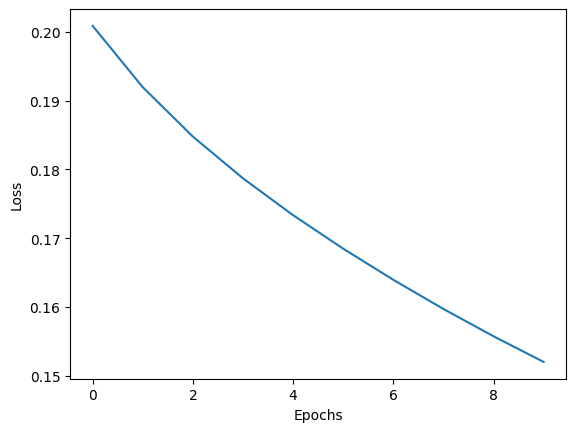

In [290]:
# plot losses

plt.clf()
plt.plot(np.arange(0, mlp.epochs), mlp.metrics['losses'])
plt.xlabel('Epochs')
plt.ylabel('Loss')


Text(0, 0.5, 'Score')

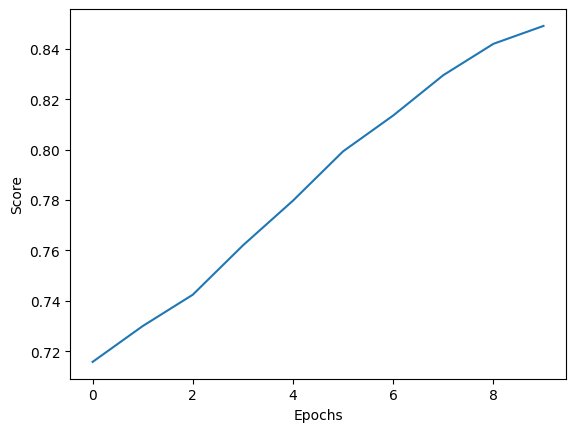

In [291]:
plt.clf()
plt.plot(np.arange(0, mlp.epochs), mlp.metrics['scores'])
plt.xlabel('Epochs')
plt.ylabel('Score')

Text(0, 0.5, 'binary cross entropy')

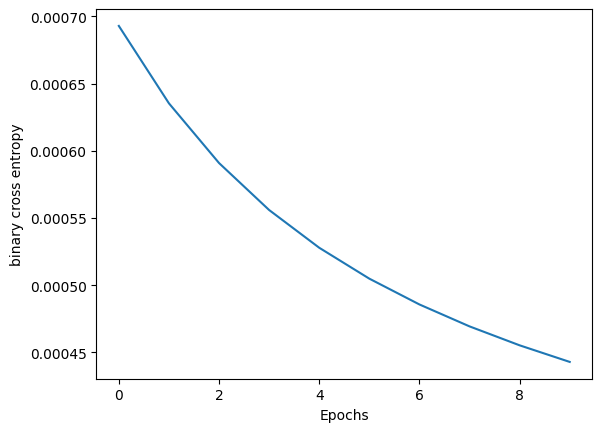

In [292]:
plt.clf()
plt.plot(np.arange(0, mlp.epochs), mlp.metrics['binary_cross_entropy'])
plt.xlabel('Epochs')
plt.ylabel('binary cross entropy')

Text(0, 0.5, 'Y')

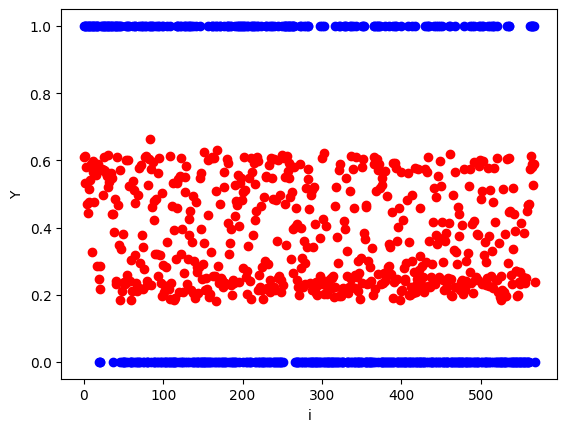

In [293]:
plt.clf()
plt.scatter(range(len(Y)), Y, color="blue")
plt.scatter(range(len(Y_pred_raw)), Y_pred_raw, color="red")
plt.xlabel('i')
plt.ylabel('Y')

In [294]:
# print(Y_pred_raw)

In [295]:
import seaborn as sn

<AxesSubplot:>

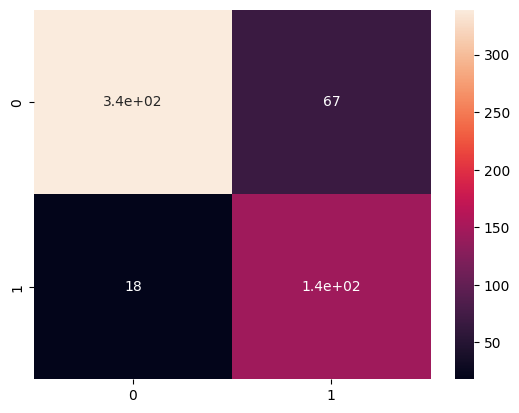

In [296]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred, Y.to_numpy())

sn.heatmap(cm, annot=True)

<AxesSubplot:>

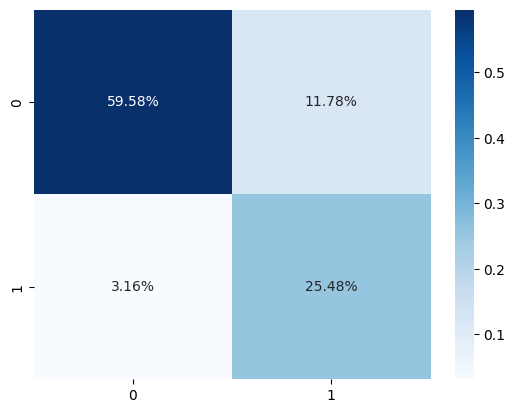

In [297]:
sn.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [304]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)



from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
# print(X.to_numpy())
# mlp.fit(X_train.to_numpy(), Y_train.to_numpy(), verbose=False, epochs=500, normalization={'stds': stds, 'means': means})

samples = np.arange(2, len(X_train), step=len(X_train) // 25)
# xs = []
val_scores = []
train_scores = []
for i in range(0, len(samples)):
    # mlp = MultiLayerPerceptron(seed=1)
    # mlp.add_layer(size=8)
    # mlp.add_layer(size=8)
    # mlp.add_layer(label="out`put_layer")
    # print(X_train.to_numpy()[:samples[i]].shape)
    mlp.fit(X_train.to_numpy()[:samples[i]], Y_train.to_numpy()[:samples[i]], epochs=100, normalization={'stds': stds, 'means': means})
    val_scores.append(accuracy_score(Y_test, mlp.predict(X_test.to_numpy())))
    train_scores.append(mlp.metrics['scores'][-1])
print(samples)
print(val_scores)
print(train_scores)


[  2  22  42  62  82 102 122 142 162 182 202 222 242 262 282 302 322 342
 362 382 402 422 442 462 482 502]
[0.7368421052631579, 0.9122807017543859, 0.8070175438596491, 0.9298245614035088, 0.8947368421052632, 0.8245614035087719, 0.6491228070175439, 0.9122807017543859, 0.631578947368421, 0.5964912280701754, 0.5964912280701754, 0.8070175438596491, 0.5964912280701754, 0.6842105263157895, 0.9298245614035088, 0.5964912280701754, 0.6140350877192983, 0.6842105263157895, 0.8421052631578947, 0.8771929824561403, 0.631578947368421, 0.8245614035087719, 0.8947368421052632, 0.8421052631578947, 0.5964912280701754, 0.7894736842105263]
[1.0, 0.9090909090909091, 0.9285714285714286, 0.9516129032258065, 0.8902439024390244, 0.8235294117647058, 0.7049180327868853, 0.8591549295774648, 0.6172839506172839, 0.6373626373626373, 0.6831683168316832, 0.7747747747747747, 0.628099173553719, 0.6564885496183206, 0.8865248226950354, 0.6390728476821192, 0.7360248447204969, 0.7017543859649122, 0.861878453038674, 0.78795811

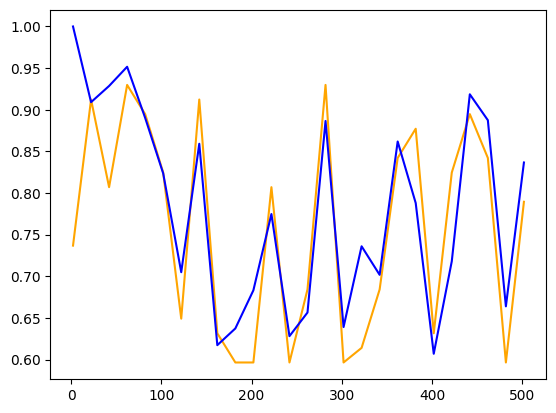

In [305]:
plt.clf()
plt.plot(samples, val_scores, color="orange")
plt.plot(samples, train_scores, color="blue")